In [1]:
import numpy as np
import mrcfile
from matplotlib import pyplot as plt
# %matplotlib inline
import collections
import tensorflow as tf
from tensorflow import spectral
from ClassFiles.relion_fixed_it import load_star
from ClassFiles.AdversarialRegularizer import AdversarialRegulariser
from ClassFiles.ut import l2
from ClassFiles.Utilities import registration
from ClassFiles.ut import locate_gt, rfft, irfft, unify_form, Rescaler, find

In [2]:
external_path= '/local/scratch/public/sl767/MRC_Data/Data_002_10k/TestAR/'
classical_path= '/local/scratch/public/sl767/MRC_Data/Data_002_10k/EM/'
debugging_path = '/local/scratch/public/sl767/MRC_Data/Data_002_10k/ValidateExternal'
pdb_id = '5A0M' #  9ICA

In [3]:
with mrcfile.open(locate_gt(pdb_id, full_path=False)) as mrc:
    gt = mrc.data.copy()

def find_iteration(k, source=0):
    it = ''
    if k<10:
        it = '0'+str(k)
    else:
        it = str(k)
        
    if source==0:
        path = external_path+pdb_id
        l = find('*it0{}_half2_class001_external_reconstruct.mrc'.format(it),path)
    elif source==1:
        path = classical_path+pdb_id
        l = find('*it0{}_half2_class001.mrc'.format(it),path)
    else:
        path = debugging_path
        l = find('*Iteration_0{}.mrc'.format(it),path)

    assert len(l)==1
    with mrcfile.open(l[0]) as mrc:
        res = mrc.data.copy()
    return res

def vis(data):
    #plt.imshow(im[...,45])
#     plt.imshow(np.mean(data.squeeze(), axis=-1))
#     plt.imshow(data.squeeze().mean(axis=-1))
    plt.imshow(np.maximum(0,data.squeeze()[...,45]))

In [10]:
### Crashes!

def savefig(array, name):
    """Pixel perfect image saving."""
    fig = plt.figure()
    ax = plt.Axes(fig, [0., 0., 1., 1.])
    ax.set_axis_off()
    fig.add_axes(ax)
    im = ax.imshow(np.maximum(0,array.squeeze()[...,45]), cmap='gray')
    plt.savefig('/home/sl767/Documents/Images/'+name)
    plt.close()

In [11]:
for k in range(13):
    plt.figure(k, figsize=(15,5))
    plt.subplot(131)
    im1 = find_iteration(k+1, source=0)
    vis(im1)
    plt.colorbar()
    plt.subplot(132)
    im2=find_iteration(k+1, source=1)
    vis(im2)
    plt.colorbar()
    plt.subplot(133)
    vis(gt)
    plt.colorbar()
    plt.close()
    
    savefig(im1, 'AR_Iteration_{}.png'.format(k+1))
    savefig(im1, 'TY_Iteration_{}.png'.format(k+1))
    
savefig(gt, 'Ground_Truth.png')

In [ ]:
with mrcfile.open(locate_gt(pdb_id, full_path=False)) as mrc:
    gt = mrc.data.copy()
gt = unify_form(gt)
gt /= np.sum(np.abs(gt))
vis(gt)

In [ ]:
reg = registration.LocalRegistrator()

In [ ]:
sjors = find_iteration(7, source=1)
sjors = unify_form(sjors)
sjors /= np.sum(np.abs(sjors))

In [ ]:
new_gt = reg.register(image=gt, reference=sjors)

In [ ]:
vis(new_gt)

In [ ]:
plt.figure(k, figsize=(18,5))
plt.subplot(131)
im1 = find_iteration(13, source=0)
vis(im1)
plt.subplot(132)
im2=find_iteration(17, source=1)
vis(im2)
plt.subplot(133)
vis(new_gt)

In [ ]:
for k in range(17):
    plt.figure(k, figsize=(15,5))
    im1 = find_iteration(k+1, source=1)
    vis(im1)
    plt.colorbar()


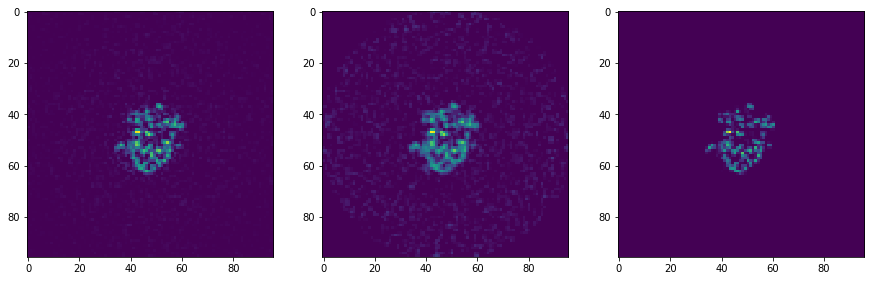

In [13]:
path_f_ar = external_path+pdb_id+'/5A0M_mult002_class001.mrc'
path_f_rel = classical_path+pdb_id+'/5A0M_mult002_class001.mrc'
with mrcfile.open(path_f_ar) as mrc:
    FINAL_AR = mrc.data.copy()
with mrcfile.open(path_f_rel) as mrc:
    FINAL_REL = mrc.data.copy()
    
savefig(FINAL_AR, 'AR_final.png')
savefig(FINAL_REL, 'TY_final.png')

plt.figure(figsize=(15,5))
plt.subplot(131)
vis(FINAL_AR)
plt.subplot(132)
vis(FINAL_REL)
plt.subplot(133)
vis(gt)

In [ ]:
def savefig(array, name, dpi=100.0):
    """Pixel perfect image saving."""
    fig = plt.figure(figsize=np.array(array.shape) / dpi, dpi=dpi)
    ax = plt.Axes(fig, [0., 0., 1., 1.])
    ax.set_axis_off()
    fig.add_axes(ax)
    im = ax.imshow(array, cmap='gray')
    plt.savefig(name)